<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/ANN_TextClassificationWithTernsorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN text classification

In [98]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [100]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


<Axes: >

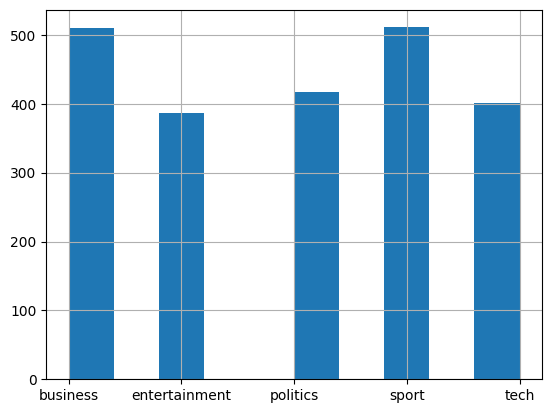

In [101]:
df['labels'].hist()

In [102]:
# map classes to integers from 0...K-1
df['labels'].astype('category').cat.codes

,0
0,0
1,0
2,0
3,0
4,0
...,...
2220,4
2221,4
2222,4
2223,4


In [103]:
df['target'] = df['labels'].astype('category').cat.codes

In [104]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train.shape, df_test.shape

((1557, 3), (668, 3))

In [105]:
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(df_train['text'])
X_test = tfidf.transform(df_test['text'])

In [106]:
Y_train = df_train['target']
Y_test = df_test['target']

In [107]:
# number of classes
K = df['target'].max() + 1 # +1 for array start from 0 index
K

5

In [108]:
D = X_train.shape[1]
D

25117

In [109]:
# build model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss

model = Model(i, x)

In [110]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 25117)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 300)                 │       7,535,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,536,905 (28.75 MB)

 Trainable params: 7,536,905 (28.75 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [112]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = X_train.toarray()
Xtest = X_test.toarray()

In [113]:
r = model.fit(
    Xtrain, Y_train,
    validation_data = (Xtest, Y_test),
    epochs = 6,
    batch_size = 32
)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.7709 - loss: 1.3662 - val_accuracy: 0.9746 - val_loss: 0.4773
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9981 - loss: 0.2480 - val_accuracy: 0.9746 - val_loss: 0.1657
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 1.0000 - loss: 0.0470 - val_accuracy: 0.9731 - val_loss: 0.1202
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9731 - val_loss: 0.1037
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9731 - val_loss: 0.0950
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9731 - val_loss: 0.0897


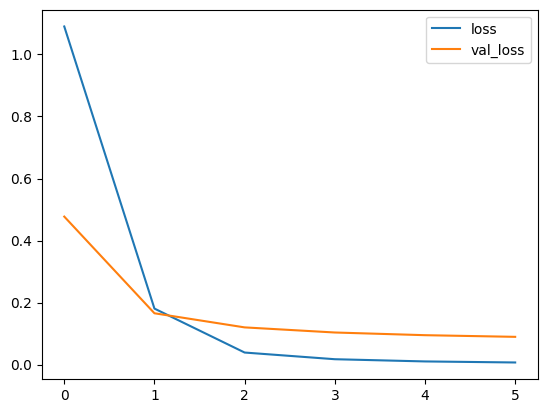

In [114]:
# plot loss / iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

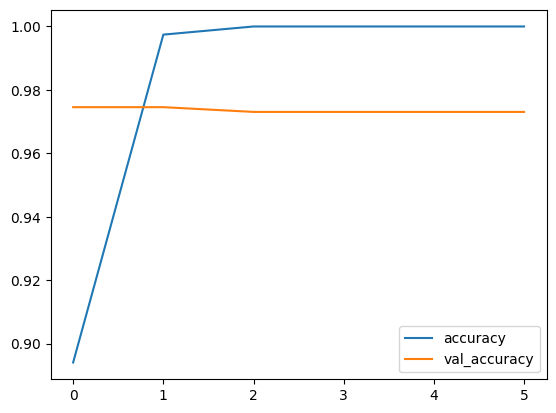

In [115]:
# plot accuracy / iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()